In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install pmdarima
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta, timezone, date
from time import time
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [4]:
import yfinance as yf

In [5]:
ticker = "ITC.NS"
df = yf.Ticker(ticker)
df

yfinance.Ticker object <ITC.NS>

In [6]:
365*4


1460

In [7]:
end_date = date.today()
start_date = end_date - timedelta(days = 1470)
tommorow = end_date + timedelta(days=1)
prices = df.history(start = '2010-01-01', end = end_date).Close
prices

Date
2010-01-04 00:00:00+05:30     60.105492
2010-01-05 00:00:00+05:30     60.697906
2010-01-06 00:00:00+05:30     60.840080
2010-01-07 00:00:00+05:30     60.650513
2010-01-08 00:00:00+05:30     60.780830
                                ...    
2024-04-08 00:00:00+05:30    429.100006
2024-04-09 00:00:00+05:30    426.350006
2024-04-10 00:00:00+05:30    436.950012
2024-04-12 00:00:00+05:30    430.100006
2024-04-15 00:00:00+05:30    425.899994
Name: Close, Length: 3524, dtype: float64

In [8]:
returns = prices.pct_change().dropna()
returns

Date
2010-01-05 00:00:00+05:30    0.009856
2010-01-06 00:00:00+05:30    0.002342
2010-01-07 00:00:00+05:30   -0.003116
2010-01-08 00:00:00+05:30    0.002149
2010-01-11 00:00:00+05:30    0.000390
                               ...   
2024-04-08 00:00:00+05:30    0.003625
2024-04-09 00:00:00+05:30   -0.006409
2024-04-10 00:00:00+05:30    0.024862
2024-04-12 00:00:00+05:30   -0.015677
2024-04-15 00:00:00+05:30   -0.009765
Name: Close, Length: 3523, dtype: float64

Text(0.5, 1.0, 'Stock Prices')

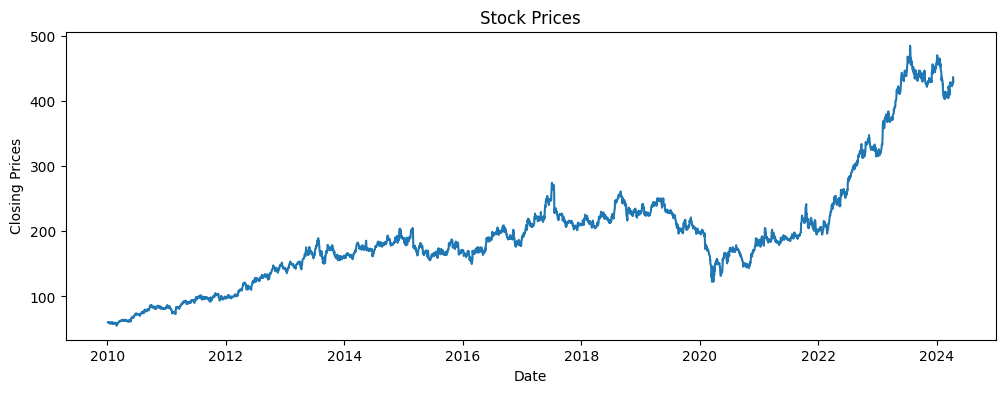

In [24]:
plt.figure(figsize = (12,4))
plt.plot(prices)
plt.ylabel("Closing Prices")
plt.xlabel("Date")
plt.title("Stock Prices")


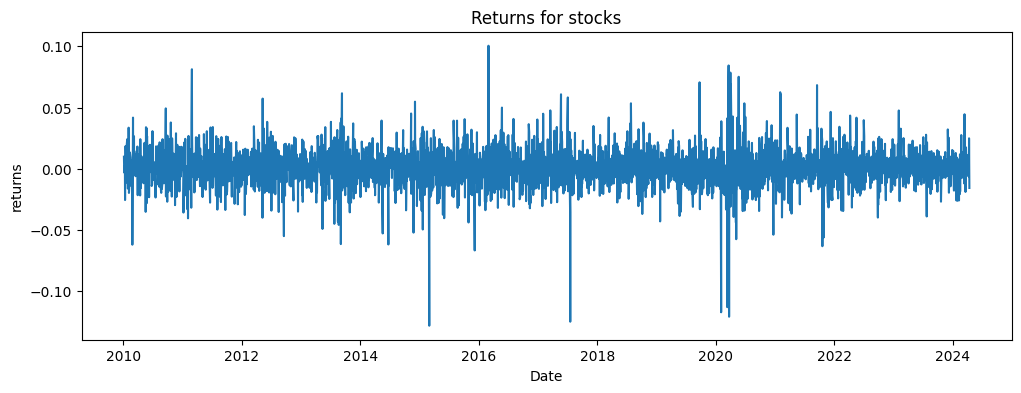

In [25]:
plt.figure(figsize = (12,4))
plt.plot(returns)
plt.ylabel("returns")
plt.xlabel("Date")
plt.title("Returns for stocks")
plt.show()


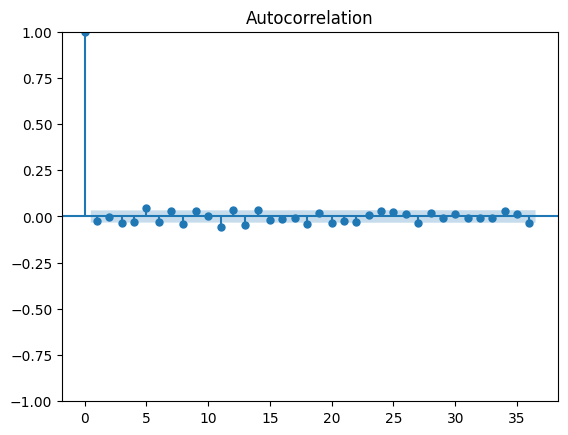

In [26]:
plot_acf(returns)
plt.show()
#18

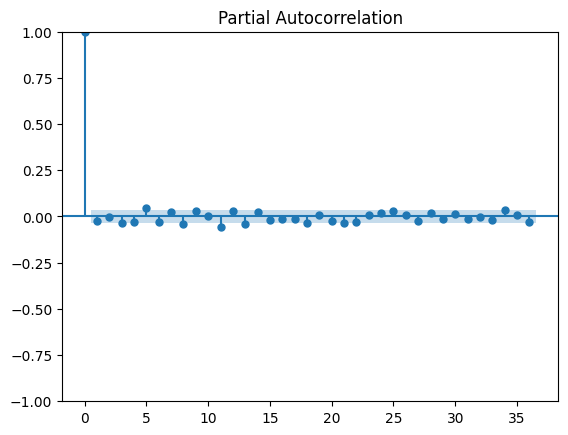

In [27]:
plot_pacf(returns, method = 'ywm')
plt.show()

In [28]:
model = auto_arima(prices, seasonality = True, m=5, trace = True, error_action = 'ignore', suppress_warnings = True)
fitted = model.fit(prices)
print(fitted.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=17941.259, Time=13.59 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=17934.319, Time=0.21 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=17935.465, Time=1.76 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=17935.474, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=17936.401, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=17935.106, Time=1.16 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=17935.140, Time=1.60 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=17936.917, Time=8.95 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=17934.587, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=17934.564, Time=0.95 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=17935.664, Time=3.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5] intercept
Total fit time: 34.524 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:     

In [29]:
predictions = model.predict(n_periods=20)
print(predictions)

3523    430.205058
3524    430.310111
3525    430.415163
3526    430.520216
3527    430.625268
3528    430.730320
3529    430.835373
3530    430.940425
3531    431.045478
3532    431.150530
3533    431.255582
3534    431.360635
3535    431.465687
3536    431.570740
3537    431.675792
3538    431.780844
3539    431.885897
3540    431.990949
3541    432.096001
3542    432.201054
dtype: float64


In [30]:
train = pd.DataFrame(prices[0:int(len(prices)*0.7)])
test = pd.DataFrame(prices[int(len(prices)*0.7):int(len(prices))])
print(train.shape)
print(test.shape)


(2466, 1)
(1057, 1)


In [16]:
next_day_p = fitted.predict(1,alpha = 0.05)
print(next_day_p)

Date
2010-01-05 00:00:00+05:30     60.105495
2010-01-06 00:00:00+05:30     60.697895
2010-01-07 00:00:00+05:30     60.840084
2010-01-08 00:00:00+05:30     60.650497
2010-01-11 00:00:00+05:30     60.780842
                                ...    
2019-12-31 00:00:00+05:30    198.286499
2020-01-01 00:00:00+05:30    197.870285
2020-01-02 00:00:00+05:30    198.203247
2020-01-03 00:00:00+05:30    199.660065
2020-01-06 00:00:00+05:30    198.536224
Name: predicted_mean, Length: 2465, dtype: float64


In [31]:
import pickle

# Assuming your trained ARIMA model is named 'model'
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
model5 = sm.tsa.statespace.SARIMAX(prices,
                                   order = (2,1,2),
                                   seasonal_order = (2,1,2,12))

model5 = model5.fit()
# Forecasting future values
# Forecasting future values




TypeError: 'Ticker' object is not subscriptable

In [11]:
forecast1 = model5.predict(n_periods=len(prices))

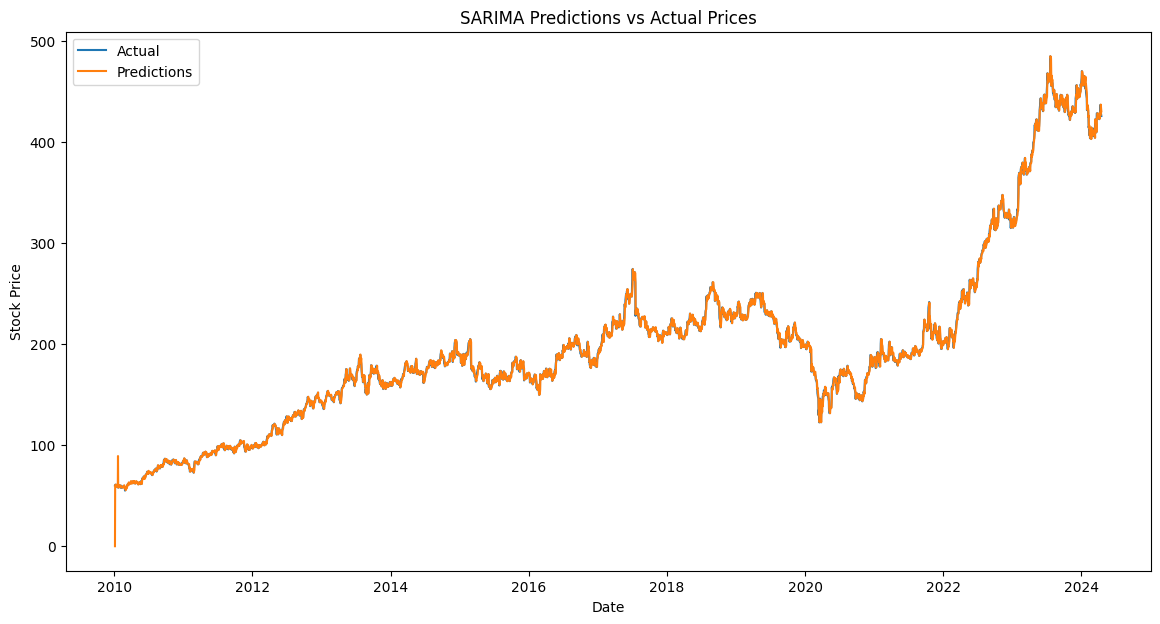

In [14]:
# Plotting ARIMA Predictions

plt.figure(figsize=(14, 7))
plt.plot(prices, label='Actual')
plt.plot(forecast1, label='Predictions')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('SARIMA Predictions vs Actual Prices')
plt.legend()
plt.show()



In [17]:
len(prices)

3524

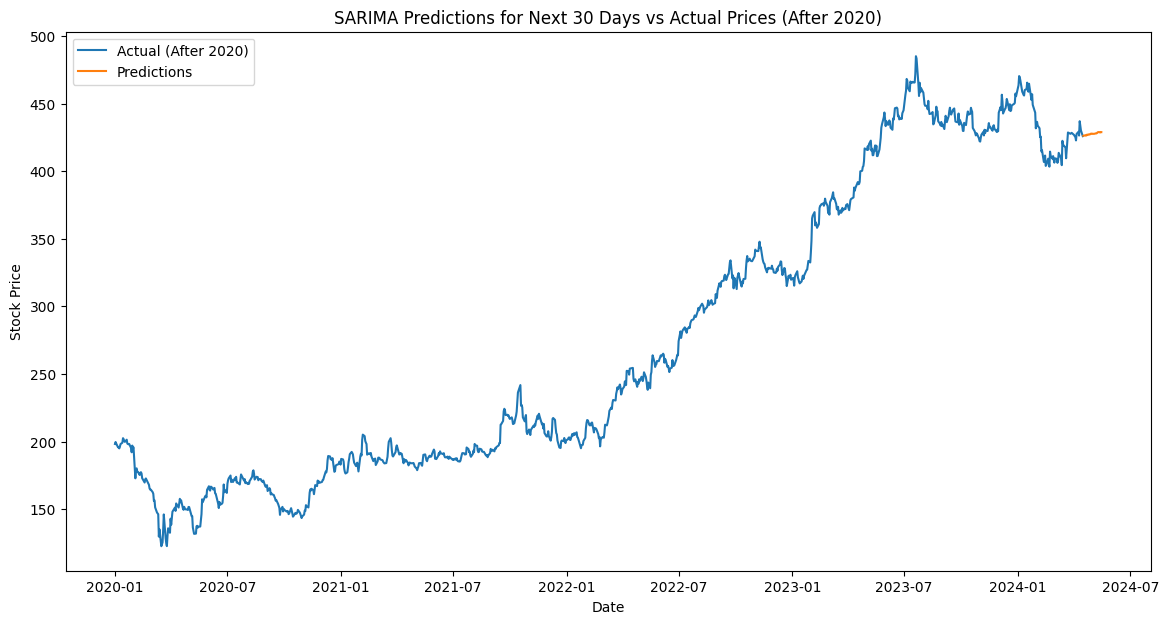

In [22]:
# Forecasting future values for the next 30 days
forecast_next_30_days = model5.forecast(steps=30)

# Generate x-axis index for the forecasted values
forecast_index = pd.date_range(start=prices.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Filter prices data for dates after 2020
prices_after_2020 = prices[prices.index.year >= 2020]

# Plotting ARIMA Predictions for the next 30 days along with actual prices after 2020
plt.figure(figsize=(14, 7))
plt.plot(prices_after_2020.index, prices_after_2020.values, label='Actual (After 2020)')
plt.plot(forecast_index, forecast_next_30_days, label='Predictions')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('SARIMA Predictions for Next 30 Days vs Actual Prices (After 2020)')
plt.legend()
plt.show()
